<style>
    /* Default styles for light mode */
    .title {
        font-family: 'Georgia', serif;
        text-align: center;
        margin-top: 40px;
    }

    .title h1 {
        font-weight: 700;
        font-size: 48px;
        color: #333333; /* Dark text for light mode */
        line-height: 1.2;
    }

    .title p {
        font-size: 18px;
        color: #666666; /* Medium grey for light mode */
        margin-top: 10px;
    }

    .title hr {
        border: none;
        border-top: 1px solid #BBBBBB; /* Light grey for light mode */
        width: 60%;
        margin: 20px auto;
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .title h1 {
            color: #F5F5F5; /* Light text for dark mode */
        }

        .title p {
            color: #BBBBBB; /* Lighter grey for dark mode */
        }

        .title hr {
            border-top: 1px solid #555555; /* Dark grey for dark mode */
        }
    }
</style>

<div class="title">
    <h1>Recurrent Neural Network</h1>
    <p>By: Trevor Pope and Micheal Callahan</p>
    <hr>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Problem Statement</h2>
    <p>
        This assignment accomplishes two goals. It demonstrates how neural networks can be used in forecasting and how they can be used in practical applications involving text (e.g., completing a search request on Google).
    </p>
    <p>
        Using a large set of texts for training, build an RNN that suggests the next word in a sentence (sequential learning). Consider the entire sentence when completing the sentence instead of words by themselves.
    </p>
    <p>
        Specifically our project is going to look at 35 different Trump speeches. This is not meant to be political rather it is an examination if we have a large amount of text from one person: can we predict what they will say next?
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Algorithm</h2>
    <p>
        ...
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Data Initialization</h2>
    <p>
        https://www.kaggle.com/datasets/christianlillelund/donald-trumps-rallies
    </p>
</div>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import kagglehub
import os
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer


# Download latest version
path = kagglehub.dataset_download("christianlillelund/donald-trumps-rallies")

C:\Users\callahan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# in path make the // to / and add the file name
path = path.replace("\\", "/")

In [3]:
# Get all file names in the directory
file_names = os.listdir(path)

# Initialize a list to store the text
file_texts = []

for file_name in file_names:
    # Get the file path
    file_path = os.path.join(path, file_name)

    # Read the text file
    with open(file_path, "r", encoding='utf-8') as file:
        text = file.read()

        # Append the text to the list
        file_texts.append((file_name, text))

df = pd.DataFrame(file_texts, columns=["file_name", "text"])
len(df)
print(df.head())


                   file_name  \
0  BattleCreekDec19_2019.txt   
1      BemidjiSep18_2020.txt   
2   CharlestonFeb28_2020.txt   
3     CharlotteMar2_2020.txt   
4    CincinnatiAug1_2019.txt   

                                                text  
0  Thank you. Thank you. Thank you to Vice Presid...  
1  There's a lot of people. That's great. Thank y...  
2  Thank you. Thank you. Thank you. All I can say...  
3  I want to thank you very much. North Carolina,...  
4  Thank you all. Thank you very much. Thank you ...  


In [4]:
# Get the amount of words in the text
df["word_count"] = df["text"].apply(lambda x: len(x.split()))

df["word_count"].describe()

count       35.000000
mean     10585.057143
std       3082.867381
min       2487.000000
25%       9110.500000
50%      10501.000000
75%      11680.000000
max      17831.000000
Name: word_count, dtype: float64

(array([1., 0., 0., 1., 3., 1., 8., 5., 7., 3., 0., 3., 0., 1., 2.]),
 array([ 2487.        ,  3509.93333333,  4532.86666667,  5555.8       ,
         6578.73333333,  7601.66666667,  8624.6       ,  9647.53333333,
        10670.46666667, 11693.4       , 12716.33333333, 13739.26666667,
        14762.2       , 15785.13333333, 16808.06666667, 17831.        ]),
 <BarContainer object of 15 artists>)

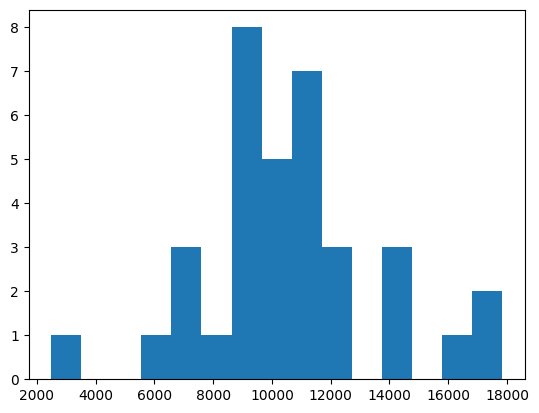

In [5]:
# make a histogram of the word count
plt.hist(df["word_count"], bins=15)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Data Preprocessing</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Remove Punctuation
        </li>
        <li>
            Split strings into lists of individual words
        </li>
        <li>
            Convert the words into integers
        </li>
    </ul>
</div>



In [6]:
# Join all the text together
text = " ".join(df["text"])

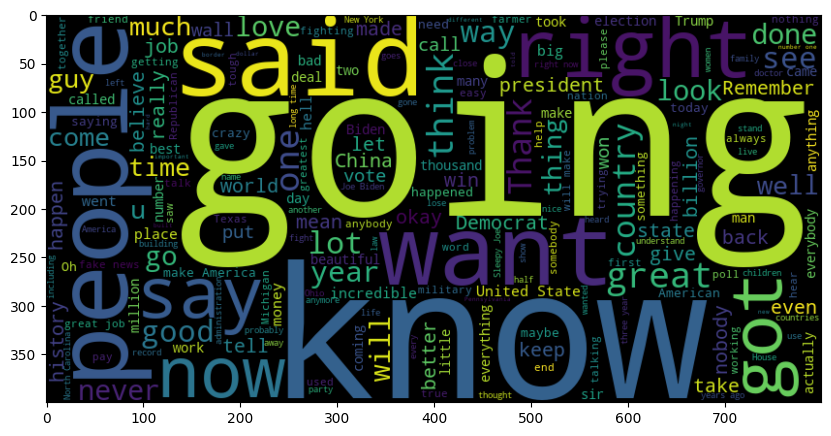

In [7]:
# Create the word cloud object
wordcloud = WordCloud(width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")


In [8]:
# filter out /n and /r (Don't know if it is in there but doesnt hurt)
df["text"] = df["text"].apply(lambda x: re.sub(r"\n|\r", " ", x))

# Filter out any punctuation
df["text"] = df["text"].apply(lambda x: re.sub(r"[^\w\s]", "", x))

Make five word sequences

In [9]:
sequences = []
file_count = 0

# Loop through each text to create sequences of 5 words
for text in df["text"]:
    words = text.split()

    file_count += 1

    count = 0

    # Check if the count + 5 is less than the length of the words
    while count + 5 < len(words):
        try:
            sequence = " ".join(words[count:count + 5])
            sequences.append(sequence)
            count += 1      # we can also use count += 5 to get non-overlapping sequences
        except IndexError:
            break

# Create a dataframe of the sequences
df_sequences = pd.DataFrame(sequences, columns=["sequence"])
print(file_count)
len(df_sequences)


35


369542

In [10]:
# Initialize the tokenizer
tokenizer = Tokenizer(oov_token="<OOV>")    # oov_token is used for out of vocabulary words
tokenizer.fit_on_texts(df_sequences["sequence"])

df_sequences["sequence"] = tokenizer.texts_to_sequences(df_sequences["sequence"])
df_sequences.head()

,sequence
0,"[72, 6, 72, 6, 72]"
1,"[6, 72, 6, 72, 6]"
2,"[72, 6, 72, 6, 4]"
3,"[6, 72, 6, 4, 798]"
4,"[72, 6, 4, 798, 91]"


In [11]:
# split sequences into input and output
X = []
y = []

for sequence in df_sequences["sequence"]:
    X.append(sequence[:-1])     # append all the words except the last one
    y.append(sequence[-1])      # append the last word

print(X[0])
print(y[0])


[72, 6, 72, 6]
72


In [12]:
X = np.array(X)
y = np.array(y)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Build the Model</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Set the number of words as a parameter.
        </li>
        <li>
            Select a subset of the data to be used as a training set.
        </li>
        <li>
            Decide on a training method, for example:
            Use words 1 through n words as features and the n+1 word as the label.
        </li>
    </ul>
    <p>
        Requirements of the Model:
    </p>
    <ul>
        <li>
            An Embedding, which maps each input word to a 100-dimensional vector. The embedding can use pretrained weights (more in a second), which we supply in the weights parameter; trainable can be set False if we don't want to update the embeddings.
        </li>
        <li>
            A Masking layer, to mask any words that do not have a pretrained embedding, which will be represented as all zeros. This layer should not be used when training the embeddings.
        </li>
        <li>
            The heart of the network: a layer of LSTM cells with dropout to prevent overfitting. Since we are only using one LSTM layer, it does not return the sequences; for using two or more layers, make sure to return sequences.
        </li>
        <li>
            A fully connected Dense layer with relu. This adds additional representational capacity to the network.
        </li>
        <li>
            A Dropout layer, to prevent overfitting to the training data.
        </li>
        <li>
            A Dense fully connected output layer, this produces a probability for every word in the vocab using softmax.
        </li>
        <li>
            Compile the model with the Adam optimizer.
        </li>
    </ul>
    <p>
        Requirements of Pretrained Embeddings:
    </p>
    <ul>
        <li>
            Load in the pretrained embeddings; choose embeddings from the GloVe algorithm, which has been trained on Wikipedia texts. Refer to "GloVe: Global Vectors for Word Representation," located in the topic Resources. Assign a 100-dimensional vector to each word in the vocab. If the word has no pretrained embedding, then this vector will be all zeros.
        </li>
        <li>
            Explore the embeddings using cosine similarity between two vectors.
        </li>
    </ul>
</div>



In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Masking, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

Bring in GloVe:

**Chat explained it well here:**
Suppose you’re training a model to predict the next word in a speech. With GloVe embeddings, the RNN can interpret that "freedom," "independence," and "liberty" have similar meanings based on their vector proximity. So, if your training data has limited occurrences of "liberty," but the model has learned from many instances of "freedom," it can still generalize well when predicting sentences that use either word, thanks to the semantic closeness learned through GloVe.

In [14]:
# initialize an empty dictionary for GloVe embeddings
embeddings_index = {}

# Load the GloVe embeddings
with open("glove.6B.100d.txt", encoding="utf-8") as file:
    for line in file:
        values = line.split()   # split the line by spaces
        word = values[0]        # get the word
        vector = np.array(values[1:], dtype="float32")    # get the vector representation of the word
        embeddings_index[word] = vector   # add the word and its vector to the dictionary

Get the embedding matrix for GloVe by getting our vocab size (num of unique words from tokenizer) and the embedding dimension which is just 100 as that is the model of GloVe we are using

In [15]:
# Get the vocabulary size: the number of unique words in the tokenizer
vocab_size = len(tokenizer.word_index) + 1      # we add 1 because the tokenizer is 1-indexed

# Get the embedding dimension
embedding_dim = 100

# Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

print(embedding_matrix.shape)

(9078, 100)


**Populate the embedding matrix:**

We are looking up in our embedding index dictionary each word and it's vector. With these vectors we will be able to identify close relationships with other vectors. Like the "liberty" and "freedom" example

In [16]:
# Loop through each word and its index from the tokenizer in data preprocessing
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)    # get the GloVe vector for the word

    # if the word is in the GloVe embeddings, then add it to the embedding matrix
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [17]:
# Make a 80/20 split with the 20 being the temporary set (we will make a 50/50 split on this set)
X_temp, X_train, y_temp, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

# Make a 50/50 split for the validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
# Model hyperparameters
embedding_dim = 100   # this is already defined from before but just so we know what it is easily
lstm_units = 128     # number of LSTM units. Number of neurons in the LSTM layer
dense_units = 64     # number of neurons in the dense layer
dropout_rate = 0.2   # dropout rate. Applied after the LSTM layer and the dense layer to prevent overfitting


model = Sequential()

# An Embedding, which maps each input word to a 100-dimensional vector. 
model.add(Embedding(input_dim = vocab_size,     # tells embedding layer how many unique words
                    output_dim = embedding_dim,   # the dimension
                    weights = [embedding_matrix],    # the GloVe embeddings
                    input_length = X_train.shape[1],    # each input sequence is of length 4. Get w/ shape
                    trainable = False))   # we do not want to train the embeddings

# A Masking layer, to mask any words that do not have a pretrained embedding, 
# which will be represented as all zeros. This layer should not be used when training the embeddings.
model.add(Masking(mask_value=0.0))
  
# The heart of the network: a layer of LSTM cells with dropout to prevent overfitting. 
# Since we are only using one LSTM layer, it does not return the sequences; 
# for using two or more layers, make sure to return sequences.
model.add(LSTM(units=lstm_units, return_sequences=False))

# A fully connected Dense layer with relu. This adds additional representational capacity to the network.
model.add(Dense(units=dense_units, activation="relu"))

# Dropout layer, to prevent overfitting to the training data. (I'm gonna hold off on this for now)


# A Dense fully connected output layer, this produces a probability for every word in the vocab using softmax.
model.add(Dense(units=vocab_size, activation="softmax"))

# Compile the model
model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │       907,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ masking_1 (Masking)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 907,800 (3.46 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 907,800 (3.46 MB)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Train the Model</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Model Checkpoint: saves the best model (as measured by validation loss) on disk for using best model.
        </li>
        <li>
            Early Stopping: halts training when validation loss is no longer decreasing.
        </li>
    </ul>
</div>



In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor="val_accuracy", patience=15)

# Train the model
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[early_stopping])

Epoch 1/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.0458 - loss: 6.6098 - val_accuracy: 0.0861 - val_loss: 5.9155
Epoch 2/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.0935 - loss: 5.6730 - val_accuracy: 0.1138 - val_loss: 5.6192
Epoch 3/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.1197 - loss: 5.2356 - val_accuracy: 0.1250 - val_loss: 5.5039
Epoch 4/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.1336 - loss: 4.9400 - val_accuracy: 0.1399 - val_loss: 5.4757
Epoch 5/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.1486 - loss: 4.6817 - val_accuracy: 0.1480 - val_loss: 5.5093
Epoch 6/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.1631 - loss: 4.4590 - val_accuracy: 0.1533 - val_loss: 5.6357
Epoch 7/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.1800 - loss: 4.2436 - val_accuracy: 0.1600 - val_loss: 5.7466
Epoch 8/100
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Test the Model</h2>
    <p>
        Requirements:
    </p>
    <ul>
        <li>
            Make predictions by passing in a starting sequence (i.e., an incomplete sentence) and complete it.
        </li>
    </ul>
</div>



In [ ]:
model.evaluate(X_test, y_test)

<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Analyze the Results</h2>
    <p>
        ...
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>Conclusion</h2>
    <p>
        ...
    </p>
</div>



<style>
    /* Default styles for light mode */
    .content {
        font-family: 'Georgia', serif;
        max-width: 800px;
        margin: 40px auto;
        line-height: 1.6;
        font-size: 20px;
        color: #333333; /* Dark text for light mode */
        text-align: justify;
    }

    .content h2 {
        font-weight: 700;
        font-size: 36px;
        color: #333333; /* Dark color for light mode */
        margin-bottom: 20px;
        text-align: center;
    }

    .content p {
        margin-top: 20px;
    }

    .content blockquote {
        border-left: 4px solid #BBBBBB;
        padding-left: 20px;
        margin: 30px 0;
        font-style: italic;
        color: #666666; /* Medium grey for light mode */
    }

    /* Styles for dark mode */
    @media (prefers-color-scheme: dark) {
        .content {
            color: #DDDDDD; /* Light text for dark mode */
        }

        .content h2 {
            color: #F5F5F5; /* Light color for dark mode */
        }

        .content blockquote {
            border-left: 4px solid #555555;
            color: #BBBBBB; /* Light grey for dark mode */
        }
    }
</style>

<div class="content">
    <h2>References</h2>
    <p>
        ...
    </p>
</div>

